# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [3]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [4]:
# add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
targets = 2*xs - 3*zs + 5 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

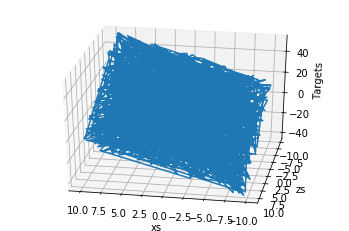

In [5]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot.
targets = targets.reshape(observations,1)

### Initialize variables

In [6]:
# initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[ 0.00906918]
 [-0.07285292]]
[0.04439856]


### Set a learning rate

In [7]:
# Set some small learning rate
# 0.02 is going to work quite well for this example

learning_rate = 0.02

### Train the model

In [12]:
# iterate over training dataset 100 times. That works well with a learning rate of 0.02.
# a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
        
    # We are considering the L2-norm loss, but divided by 2
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant,this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)
     
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0.1661066837563296
0.16610663678582027
0.16610659167355873
0.16610654834602867
0.16610650673262267
0.16610646676552634
0.16610642837960865
0.16610639151231488
0.1661063561035652
0.16610632209565665
0.16610628943316924
0.16610625806287535
0.16610622793365326
0.16610619899640364
0.1661061712039695
0.16610614451105987
0.16610611887417537
0.16610609425153747
0.1661060706030205
0.16610604789008623
0.16610602607572136
0.16610600512437645
0.1661059850019087
0.1661059656755262
0.16610594711373425
0.16610592928628387
0.16610591216412332
0.1661058957193498
0.16610587992516432
0.16610586475582867
0.16610585018662236
0.16610583619380298
0.1661058227545678
0.16610580984701562
0.16610579745011203
0.16610578554365488
0.16610577410824104
0.16610576312523515
0.16610575257673896
0.16610574244556245
0.16610573271519563
0.16610572336978163
0.16610571439409097
0.16610570577349662
0.16610569749395024
0.16610568954195942
0.16610568190456518
0.1661056745693217
0.16610566752427508
0.16610566075794475
0.1661056

### Print weights and biases and see if we have worked correctly.

In [13]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 1.99883454]
 [-3.00172727]] [4.98916444]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

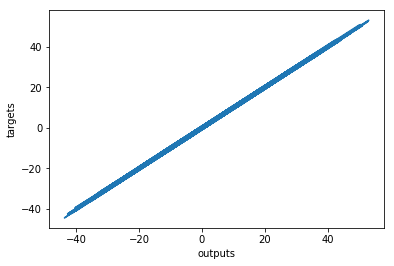

In [14]:
# We print the outputs and the targets in order to see if they have a linear relationship.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()